In [17]:
%matplotlib inline
%pwd

import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt


folders = list(filter(
    lambda x : os.path.isdir(x) and '.' not in x,
    os.listdir()
))
folders.sort()

for i, folder in enumerate(folders) :
    print(f"{i} {folder}")

0 2022_08_01__01_57_57


In [18]:
# select folder index

folder_idx = 0

data_root_dir = folders[folder_idx]
files = os.listdir(data_root_dir)
files.sort()
print(files[0], "...", files[-1])

00001.pkl ... 00289.pkl


[2335, 1830, 1062]


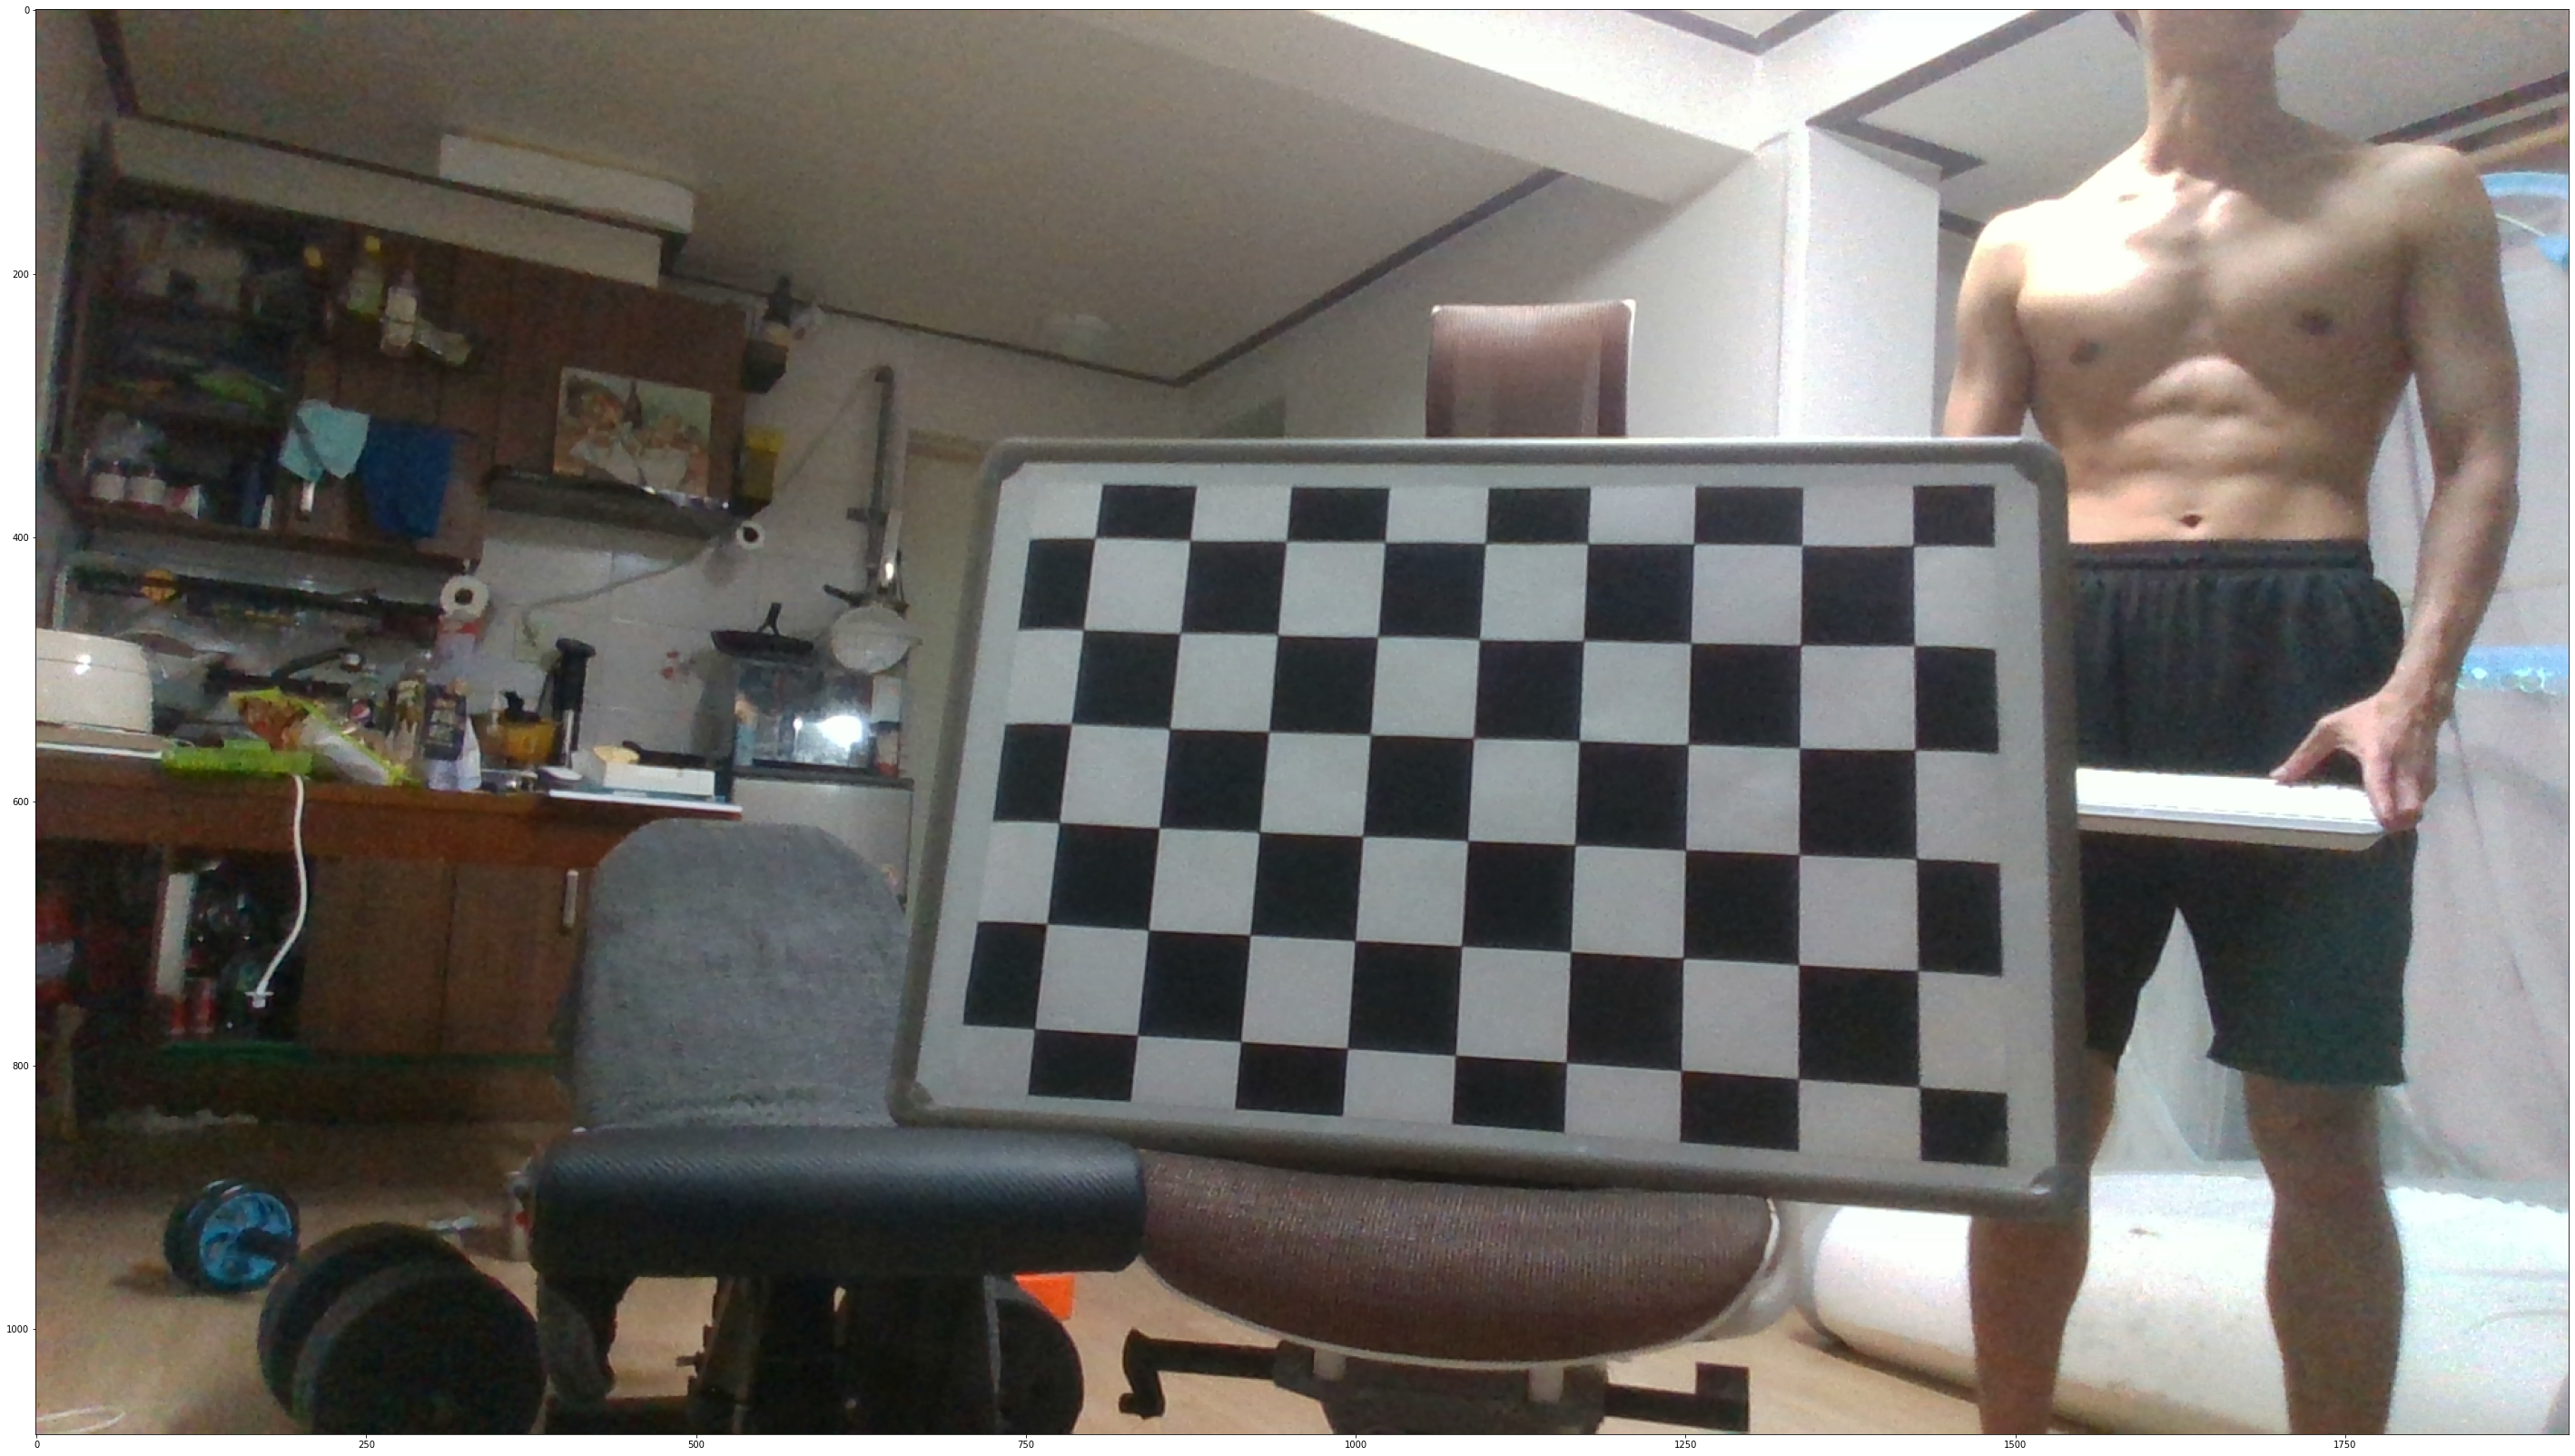

In [19]:
# select file index

file_idx = 1

# open sample file

file_name = os.path.join(data_root_dir, f'{file_idx:05d}.pkl')

with open(file_name, "rb") as fp :
    data = pickle.load(fp)
    #print(data["homography"])
    print(data["pressure_sensor"])

    image_1 = data["images"]["color_1"]
    image_2 = data["images"]["color_2"]

    #plt.figure(figsize=(50, 30))
    #plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    #plt.show()
    
    plt.figure(figsize=(50, 30))
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.show()

In [16]:
num_files = len(files)

file_numbers_to_watch = []
file_numbers_to_watch = list(range(1, num_files, int(num_files / 10)))

for file_number in file_numbers_to_watch :
    file_name = os.path.join(data_root_dir, f'{file_number:05d}.pkl')
    with open(file_name, "rb") as fp :
        data = pickle.load(fp)
        homography = data["homography"]
        pressure_data = data["pressure_sensor"]
        image_1 = data["images"]["color_1"]
        image_2 = data["images"]["color_2"]

        image_1_warped = cv2.warpPerspective(
            image_1,
            homography,
            (image_2.shape[1], image_2.shape[0])
        )

        overlayed = np.array(
            image_1_warped.astype("float32") * 0.5 + 
            image_2.astype("float32") * 0.5,
            dtype=np.uint8
        )

        plt.figure(figsize=(40, 20))
        plt.subplot(2, 2, 1)
        plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
        plt.subplot(2, 2, 2)
        plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
        plt.subplot(2, 2, 3)
        plt.imshow(cv2.cvtColor(image_1_warped, cv2.COLOR_BGR2RGB))
        plt.subplot(2, 2, 4)
        plt.imshow(cv2.cvtColor(overlayed, cv2.COLOR_BGR2RGB))

KeyError: 'homography'